In [1]:
import os
import numpy as np
import matplotlib as mpl
from pyDOE import lhs
from scipy.interpolate import griddata
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.io
#import plotting #this should be where plotting.py is saved relative to current directory; it is no longer necessary
import matplotlib.pyplot as plt
import math


In [6]:
#this ipython file should plot the actual solution to Burger's equation as provided by burgers_shock.mat and 2 predicted solutions given in .mat dictionaries with keys 'sol' (the solution) and 'data' (the set of training points)

#this should be the .mat file outputted by cluster; it contains solution data as well as training set data
inputs1 = 'examples\solution_int_data84_16.mat'
inputs2 = 'examples\solution_int_data84_128.mat'

#it had been useful to label files using the size of the training data used to produce those solutions
N_u1 = 84
N_f1 = 4
N_u2 = 84
N_f2 = 7


#Enter numbers between 0 and 1 here. They represent the proportion of the graph to cut out. For example. Tmin = .5 and Tmax = .75 means that only the third quarter of the graph along the t-axis will be shown
#alternatively, t and x values entered directly into the functions should satisfy 0 \leq t \leq 100 and 0 \leq x \leq 256
Xmin = .4
Xmax = .55
Tmin = 0
Tmax = .9

Xmin = round(256*Xmin)
Xmax = round(256*Xmax) - 1
Tmin = round(100*Tmin)
Tmax = round(100*Tmax) - 1

#Directory where plots will be saved
base_plt_dir = './'

In [7]:
#retrieving prediction data from inputs
#print(inputs)
prediction_data1 = scipy.io.loadmat(inputs1)
u_pred1 = prediction_data1['sol']     #variable "u_pred" is the predicted solution with noise added, given by data in variable "inputs" (cell 2)
training_data1 = prediction_data1['data']#u_data
prediction_data2 = scipy.io.loadmat(inputs2)
u_pred2 = prediction_data2['sol']   
training_data2 = prediction_data2['data']#sol

#preparing solution data
data = scipy.io.loadmat('burgers_shock.mat')
x = data['x']
t = data['t']
Exact = np.real(data['usol'])
lb = np.array([-5.0, 0.0])
ub = np.array([5.0, np.pi / 2])
#N_f = 5000
X, T = np.meshgrid(x, t)
u_star = Exact.flatten()[:, None]
X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))
u = Exact.T.flatten()[:,None]    #variable "u" is the actual solution


In [8]:
#defining plotting functions

def create_plot(data, title, filename, training_data, tmin = 0, tmax = 99, xmin = 0, xmax = 255) :
    print(tmax)
    fig, ax = newfigure(1.0, 1.1)
    ax.axis('off')
    plot = 'n'
    if tmin == 0 and tmax == 99 and xmin == 0 and xmax == 255 and title != "u(t,x)":
        plot = 'y'
    
    U_data = griddata(X_star, data.flatten(), (X,T), method='cubic')
    U_data = U_data[tmin:tmax + 1, xmin:xmax + 1]
    
    #######  ##################
    gs0 = gridspec.GridSpec(1, 2)
    gs0.update(top=1 - 0.06, bottom=1 - 1 / 3, left=0.15, right=0.85, wspace=0)
    ax = plt.subplot(gs0[:, :])
    #print('TMAX:')
    #print(tmax)
    mint = round(t[tmin][0], 2)
    maxt = round(t[tmax][0], 2)
    minx = round(x[xmin][0], 2)
    maxx = round(x[xmax][0], 2)
    t_1 = round((3*mint + maxt)/4, 2)
    t_2 = round((mint + maxt)/2, 2)
    t_3 = round((mint + 3*maxt)/4, 2)
    x_mid = round((minx+maxx)/2, 2)
    #axes = plt.gca()
    #ax.set_xlim([.5, .75])
    #ax.set_ylim([.3,.4])
    #print(mint, maxt, minx, maxx)
    h = ax.imshow(U_data.T, interpolation='nearest', cmap='rainbow',
                  extent=[t.min(), t.max(), x.min(), x.max()], vmin = -1, vmax = 1,
                  origin='lower', aspect='auto')
    #h = ax.imshow(U_data.T, interpolation='nearest', cmap='rainbow', extent=[0, 10, 2, 10], origin='lower', aspect='auto')
    #ax.set_xticklabels(['', mint, (3*mint + maxt)/4, (mint + maxt)/2, (mint + 3*maxt)/4, maxt])
    ax.set_xticklabels(['  ' + str(mint), '        ' + str(t_1), '                 ' + str(t_2), '                      ' + str(t_3), '                              ' + str(maxt)])
    #ax.set_yticklabels(['', minx, (minx+maxx)/2, maxx])
    ax.set_yticklabels([minx, x_mid, maxx])
    #ax.set_xticklabels([mint, t_1, t_2, t_3, maxt])

    divider = make_axes_locatable(ax)

    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(h, cax=cax)

    if plot == 'y' and training_data != []:
        ax.plot(training_data[:, 1], training_data[:, 0], 'kx', label='Data (%d points)' % (training_data.shape[0]), markersize=4, clip_on=False)
    
    line = np.linspace(x.min(), x.max(), 2)[:, None]
    ax.plot(t[25] * np.ones((2, 1)), line, 'w-', linewidth=1)
    ax.plot(t[50] * np.ones((2, 1)), line, 'w-', linewidth=1)
    ax.plot(t[75] * np.ones((2, 1)), line, 'w-', linewidth=1)

    

    ax.set_xlabel('$t$')
    ax.set_ylabel('$x$')
    ax.legend(frameon=False, loc='best')
    ax.set_title(title, fontsize=10)

    file_targ = os.path.expanduser("{}/{}.png".format(base_plt_dir, filename))
    plt.savefig(file_targ)
    print("created {}".format(file_targ))

    
    
def newfigure(width, nplots=1):
    fig = plt.figure(figsize=figsize(width, nplots))
    ax = fig.add_subplot(111)
    return fig, ax


def savefigure(filename, crop=True):
    if crop:
        plt.savefig('{}.pdf'.format(filename), bbox_inches='tight', pad_inches=0)
        plt.savefig('{}.eps'.format(filename), bbox_inches='tight', pad_inches=0)
    else:
        plt.savefig('{}.pdf'.format(filename))
        plt.savefig('{}.eps'.format(filename))
        
def figsize(scale, nplots=1):
    fig_width_pt = 390.0  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27  # Convert pt to inch
    golden_mean = (np.sqrt(5.0) - 1.0) / 2.0  # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt * inches_per_pt * scale  # width in inches
    fig_height = nplots * fig_width * golden_mean  # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size

99


No handles with labels found to put in legend.


created .//burgers_solution.png
89


No handles with labels found to put in legend.


created .//burgers_solution_zoom.png
99


C:\Users\dolor\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


created .//epochs_solutions\predicted_solution1.png
99
created .//epochs_solutions\predicted_solution2.png
99
created .//epochs_solutions\predicted_error1.png
99
created .//epochs_solutions\predicted_error2.png
89


No handles with labels found to put in legend.


created .//epochs_solutions\predicted_error_zoom1.png
89


No handles with labels found to put in legend.


created .//epochs_solutions\predicted_error_zoom2.png


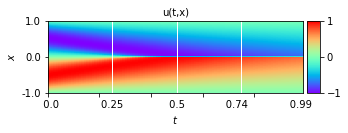

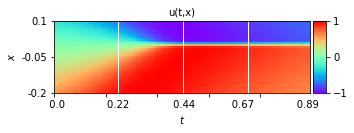

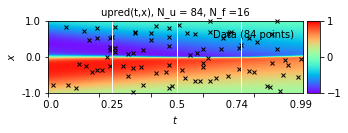

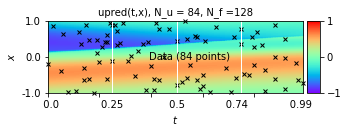

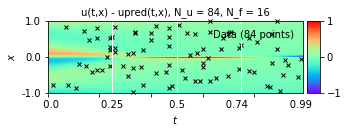

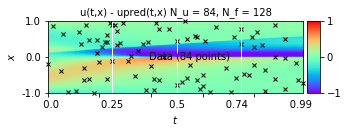

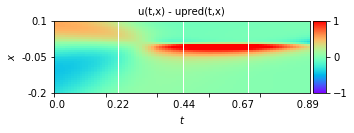

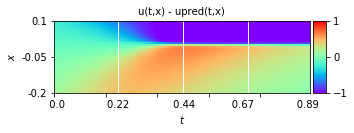

In [9]:
#Graphing the actual solution
create_plot(u, "u(t,x)", 'burgers_solution', [])

#Graphing the actual solution, zoomed in
create_plot(u, "u(t,x)", 'burgers_solution_zoom', [], Tmin, Tmax, Xmin, Xmax)



#Graphing the predicted solution
create_plot(u_pred1, "upred(t,x), N_u = %s, N_f =%s" % (N_u1, 2**N_f1), 'epochs_solutions\predicted_solution1', training_data1)
create_plot(u_pred2, "upred(t,x), N_u = %s, N_f =%s" % (N_u2, 2**N_f2), 'epochs_solutions\predicted_solution2', training_data2)

#Graphing the predicted solution, zoomed in
#create_plot(u_pred, "upred(t,x)", 'examples\graphs\predicted_solution_zoom%s_%s_%s' % (N_u, N_f, error), Tmin, Tmax, Xmin, Xmax)


#Graphing the error
create_plot(u - u_pred1, "u(t,x) - upred(t,x), N_u = %s, N_f = %s" % (N_u1, 2**N_f1), 'epochs_solutions\predicted_error1', training_data1)
create_plot(u - u_pred2, "u(t,x) - upred(t,x) N_u = %s, N_f = %s" % (N_u2, 2**N_f2), 'epochs_solutions\predicted_error2', training_data2)
#Graphing the error, zoomed in
create_plot(u-u_pred1, "u(t,x) - upred(t,x)", 'epochs_solutions\predicted_error_zoom1', [], Tmin, Tmax, Xmin, Xmax)
create_plot(u-u_pred2, "u(t,x) - upred(t,x)", 'epochs_solutions\predicted_error_zoom2', [], Tmin, Tmax, Xmin, Xmax)